## Generative Models


Instead of trying to model p(y|x) directly, Generative algorithms try to learn p(x|y) and p(y) from the data. After modeling these probabilities, our model can then use Bayes rule to derive the posterior distribution on y given x:


$$ P(y \mid x) = \frac{P(x \mid y) \, P(y)}{P(x)} $$


In this type of algorithm, we are trying to model the probability distribution for each class. For the binary case, we would be trying to learn p(x|y = 0) and p(x|y = 1), as well as the prior, which is p(y). Models like logistic regression and perceptron are considered discriminative algorithms, since they try to learn p(y|x) directly or a mapping from inputs to target labels.

### 1. Gaussian Discriminant Analysis

In this model, we are assuming that p(x|y) is distributed according to a multivariate normal distribution. To test this algorithm, we can generate data using the make_classification tool from sklearn datasets.

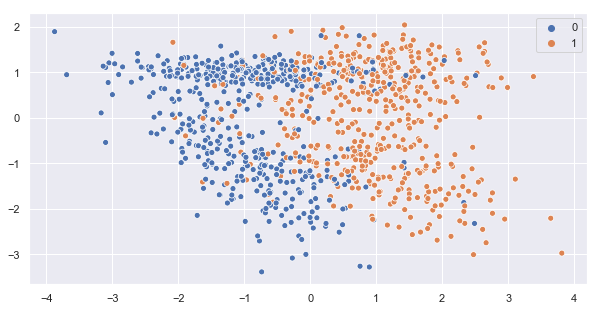

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
# utility functions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create a dataset
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_clusters_per_class=2, n_redundant=0,
                           flip_y=0.05, random_state=29)

# split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y)

# visualize all our data
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x[:, 0], x[:, 1], hue=y)

In [2]:
from estimator.generative_model import GaussianDiscriminantAnalysis
gda = GaussianDiscriminantAnalysis()
gda.fit(x_train, y_train)
predictions = gda.predict(x_test)
print("Accuracy on test set: {:.4f}".format(accuracy_score(y_test, predictions)))

Accuracy on test set: 0.8320


### 2. Naive Bayes

In Naive Bayes we are assuming that features are conditionally independent given y.

In this example we will be using a Multinomial Naive Bayes to classify text from SMS messages as spam or not spam. For more information about this dataset check this [page](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

In [36]:
from pandas import read_csv
df = read_csv('../datasets/spam_dataset.csv')
df.head()

,is_spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


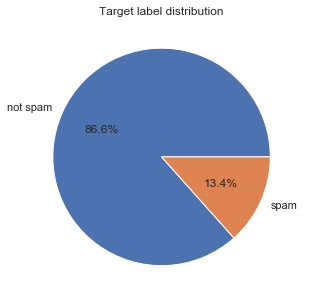

In [25]:
pie_data = [len(df) - df.is_spam.sum(), df.is_spam.sum()]
plt.figure(figsize=(10, 5))
plt.title('Target label distribution')
ax = plt.pie(pie_data, labels=['not spam', 'spam'], autopct='%1.1f%%')

First we will use Count Vectorizer to count the number of times each word appears in each sample. This sklearn function does also remove stop words.

In [26]:
from sklearn import feature_extraction

vec = feature_extraction.text.CountVectorizer(stop_words='english')
x = vec.fit_transform(df.sms).todense()
x.shape

(5572, 8404)

We have 5572 messages and a vocabulary of 8404 words. 

In [27]:
from estimator.generative_model import MultinomialNaiveBayes
x_train, x_test, y_train, y_test = train_test_split(x, df.is_spam.values, random_state=19)
nb = MultinomialNaiveBayes()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)

We can use a classification report and confusion matrix to evaluate our predictions:

In [34]:
print(classification_report(y_test, predictions, labels=[0, 1],
                            target_names=['not spam', 'spam']))

              precision    recall  f1-score   support

    not spam       1.00      0.98      0.99      1196
        spam       0.90      0.97      0.94       197

   micro avg       0.98      0.98      0.98      1393
   macro avg       0.95      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393



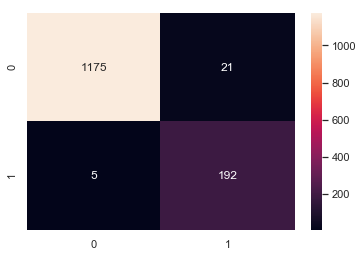

In [35]:
cm = confusion_matrix(y_test, predictions)
heatmap = sns.heatmap(cm, annot=True, fmt="d")